# Classification with CART algorithmn

In [115]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier,plot_tree,DecisionTreeRegression
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [19]:
df=pd.read_csv("E:\sliit\Year 3\SEM 1\FDM\Labs\Lab4\Practical 04 - weather dataset.csv")

In [18]:
df.head()

,Unnamed: 0,Outlook,Temperature,Humidity,Windy,Play golf
0,0,Rainy,Hot,High,False,No
1,1,Rainy,Hot,High,True,No
2,2,Overcast,Hot,High,False,Yes
3,3,Sunny,Mild,High,False,Yes
4,4,Sunny,Cool,Normal,False,Yes


In [25]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [37]:
df

,Outlook,Temperature,Humidity,Windy,Play golf
0,Rainy,Hot,High,False,No
1,Rainy,Hot,High,True,No
2,Overcast,Hot,High,False,Yes
3,Sunny,Mild,High,False,Yes
4,Sunny,Cool,Normal,False,Yes
5,Sunny,Cool,Normal,True,No
6,Overcast,Cool,Normal,True,Yes
7,Rainy,Mild,High,False,No
8,Rainy,Cool,Normal,False,Yes
9,Sunny,Mild,Normal,False,Yes


In [35]:
le=LabelEncoder()

In [47]:
le.fit_transform(df["Play golf"])  # to encode column by column

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0], dtype=int64)

In [44]:
df=df.apply(le.fit_transform)       #to encode the whole data set ag once

In [45]:
df

,Outlook,Temperature,Humidity,Windy,Play golf
0,1,1,0,0,0
1,1,1,0,1,0
2,0,1,0,0,1
3,2,2,0,0,1
4,2,0,1,0,1
5,2,0,1,1,0
6,0,0,1,1,1
7,1,2,0,0,0
8,1,0,1,0,1
9,2,2,1,0,1


In [49]:
df.iloc[3,1]     # to access an single element

2

In [50]:
df.iloc[1,2:]

Humidity     0
Windy        1
Play golf    0
Name: 1, dtype: int64

In [51]:
df.iloc[1:3,1:3]

,Temperature,Humidity
1,1,0
2,1,0


In [55]:
df.iloc[:,:4]

,Outlook,Temperature,Humidity,Windy
0,1,1,0,0
1,1,1,0,1
2,0,1,0,0
3,2,2,0,0
4,2,0,1,0
5,2,0,1,1
6,0,0,1,1
7,1,2,0,0
8,1,0,1,0
9,2,2,1,0


In [77]:
x=df.iloc[:,:4].values      #covert the data set into array of values

In [78]:
x #first 4 columns (input columns)

array([[1, 1, 0, 0],
       [1, 1, 0, 1],
       [0, 1, 0, 0],
       [2, 2, 0, 0],
       [2, 0, 1, 0],
       [2, 0, 1, 1],
       [0, 0, 1, 1],
       [1, 2, 0, 0],
       [1, 0, 1, 0],
       [2, 2, 1, 0],
       [1, 2, 1, 1],
       [0, 2, 0, 1],
       [0, 1, 1, 0],
       [2, 2, 0, 1]], dtype=int64)

In [75]:
y=df.iloc[:,4].values  

In [76]:
y #last column (output column)

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [62]:
#splitting the data set

In [79]:
train_test_split(x,y,test_size=0.4,random_state=1)         #get 20% for testing

[array([[1, 1, 0, 1],
        [0, 1, 1, 0],
        [1, 1, 0, 0],
        [2, 2, 0, 1],
        [2, 2, 1, 0],
        [1, 0, 1, 0],
        [0, 2, 0, 1],
        [2, 0, 1, 1]], dtype=int64),
 array([[2, 2, 0, 0],
        [1, 2, 0, 0],
        [0, 0, 1, 1],
        [0, 1, 0, 0],
        [1, 2, 1, 1],
        [2, 0, 1, 0]], dtype=int64),
 array([0, 1, 0, 0, 1, 1, 1, 0]),
 array([1, 0, 1, 1, 1, 1])]

In [80]:
# list unpacking

In [87]:
#eg:-
a,b,c,d=[10,12,23,45]

In [88]:
a

10

In [89]:
c

23

In [90]:
###################

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=1)

In [82]:
x_train

array([[1, 1, 0, 1],
       [0, 1, 1, 0],
       [1, 1, 0, 0],
       [2, 2, 0, 1],
       [2, 2, 1, 0],
       [1, 0, 1, 0],
       [0, 2, 0, 1],
       [2, 0, 1, 1]], dtype=int64)

In [84]:
x_test

array([[2, 2, 0, 0],
       [1, 2, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [1, 2, 1, 1],
       [2, 0, 1, 0]], dtype=int64)

In [85]:
y_train

array([0, 1, 0, 0, 1, 1, 1, 0])

In [86]:
y_test

array([1, 0, 1, 1, 1, 1])

In [100]:
model=DecisionTreeClassifier(criterion="gini")

In [101]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

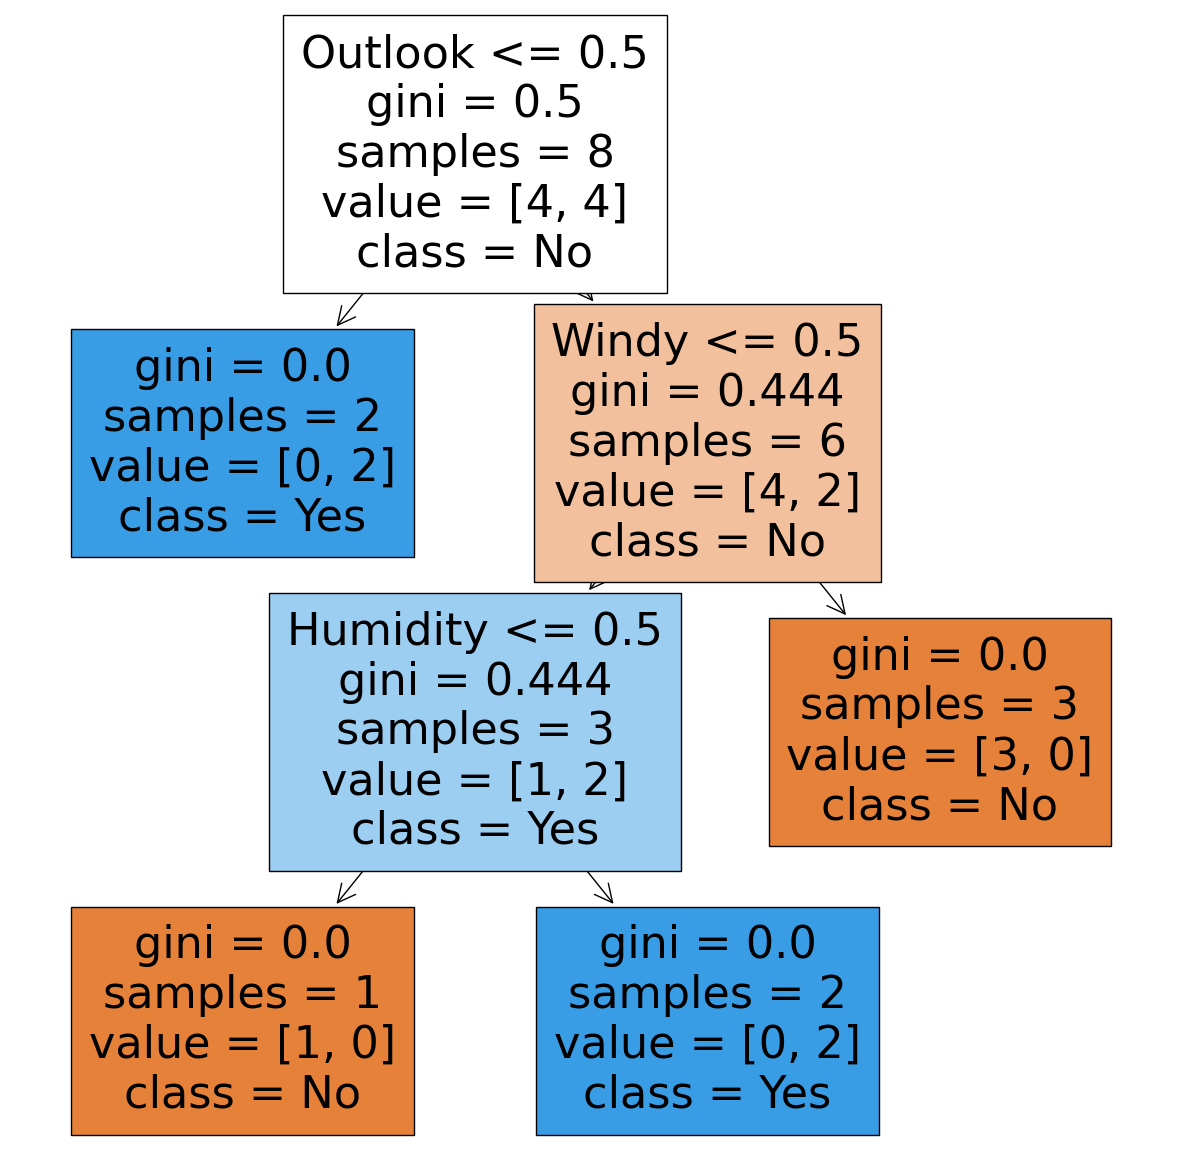

In [111]:
plt.figure(figsize=(15,15))
plot_tree(model,feature_names=df.columns,class_names=["No","Yes"],filled=True)
plt.show()

In [108]:
df.columns


Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play golf'], dtype='object')

In [112]:
#checking the accuracy

In [117]:
#prediction for the x_test
y_pred=model.predict(x_test)

In [119]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [121]:
model.predict([[1,0,0,1]])

array([0])